# Pengaruh RMS Normalization pada FFNN

Pengujian ini bertujuan untuk menganalisis pengaruh RMS Normalization terhadap performa model FFNN

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt


# Add parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

%load_ext autoreload
%autoreload 2

from model import FFNN
from activation import ReLU, Softmax
from loss import CategoricalCrossEntropy
from normalization import NoNormalization, RMSNorm
from layer import Layer
from utils import train_and_evaluate, load_mnist_data

# Create out dir
os.makedirs("../../out", exist_ok=True)

In [2]:
def create_model_with_normalization(input_size, hidden_size, output_size, normalization):
    """
    Create a model with the specified normalization for all layers
    """
    model = FFNN(
        layer_sizes=[input_size, hidden_size, output_size],
        activations=[ReLU(), Softmax()],
        loss=CategoricalCrossEntropy()
    )
    
    # Replace the default normalization with the specified one
    model.layers = []
    for i in range(len(model.layer_sizes) - 1):
        model.layers.append(Layer(
            input_size=model.layer_sizes[i],
            output_size=model.layer_sizes[i + 1],
            activation=model.activations[i],
            normalization=normalization
        ))
    
    return model

Loading MNIST dataset...
Data loaded: X_train: (56000, 784), y_train: (56000,)
Test data: X_test: (14000, 784), y_test: (14000,)

Training model Without Normalization

Training FFNN Without Normalization...


Epoch 1/10: 100%|██████████| 1750/1750 [00:03<00:00, 473.72batch/s, loss=0.0938]


Epoch 1/10 - loss: 0.2456, val_loss: 0.1937


Epoch 2/10: 100%|██████████| 1750/1750 [00:03<00:00, 464.91batch/s, loss=0.4145]


Epoch 2/10 - loss: 0.1594, val_loss: 0.1985


Epoch 3/10: 100%|██████████| 1750/1750 [00:04<00:00, 418.05batch/s, loss=0.1937]


Epoch 3/10 - loss: 0.1469, val_loss: 0.2136


Epoch 4/10: 100%|██████████| 1750/1750 [00:04<00:00, 416.12batch/s, loss=0.0124]


Epoch 4/10 - loss: 0.1329, val_loss: 0.1721


Epoch 5/10: 100%|██████████| 1750/1750 [00:04<00:00, 414.52batch/s, loss=0.0069]


Epoch 5/10 - loss: 0.1226, val_loss: 0.2055


Epoch 6/10: 100%|██████████| 1750/1750 [00:04<00:00, 411.01batch/s, loss=0.0954]


Epoch 6/10 - loss: 0.1107, val_loss: 0.2098


Epoch 7/10: 100%|██████████| 1750/1750 [00:04<00:00, 412.37batch/s, loss=0.5841]


Epoch 7/10 - loss: 0.1105, val_loss: 0.2438


Epoch 8/10: 100%|██████████| 1750/1750 [00:04<00:00, 409.92batch/s, loss=0.0002]


Epoch 8/10 - loss: 0.1063, val_loss: 0.2240


Epoch 9/10: 100%|██████████| 1750/1750 [00:04<00:00, 412.19batch/s, loss=0.0022]


Epoch 9/10 - loss: 0.0989, val_loss: 0.2569


Epoch 10/10: 100%|██████████| 1750/1750 [00:04<00:00, 406.49batch/s, loss=0.2048]


Epoch 10/10 - loss: 0.0944, val_loss: 0.2539
Training took 41.67 seconds
FFNN Without Normalization accuracy: 0.9616

Training model With RMSNorm

Training FFNN With RMSNorm...


Epoch 1/10: 100%|██████████| 1750/1750 [00:04<00:00, 395.25batch/s, loss=0.4062]


Epoch 1/10 - loss: 0.5691, val_loss: 0.5053


Epoch 2/10: 100%|██████████| 1750/1750 [00:04<00:00, 401.04batch/s, loss=1.5876]


Epoch 2/10 - loss: 1.1848, val_loss: 1.5147


Epoch 3/10: 100%|██████████| 1750/1750 [00:04<00:00, 400.23batch/s, loss=2.0889]


Epoch 3/10 - loss: 1.9603, val_loss: 2.1279


Epoch 4/10: 100%|██████████| 1750/1750 [00:04<00:00, 395.21batch/s, loss=2.4843]


Epoch 4/10 - loss: 2.1600, val_loss: 2.1570


Epoch 5/10: 100%|██████████| 1750/1750 [00:04<00:00, 395.60batch/s, loss=2.1617]


Epoch 5/10 - loss: 2.2083, val_loss: 2.2253


Epoch 6/10: 100%|██████████| 1750/1750 [00:04<00:00, 392.86batch/s, loss=2.2763]


Epoch 6/10 - loss: 2.2166, val_loss: 2.2544


Epoch 7/10: 100%|██████████| 1750/1750 [00:04<00:00, 383.61batch/s, loss=2.1522]


Epoch 7/10 - loss: 2.2328, val_loss: 2.1692


Epoch 8/10: 100%|██████████| 1750/1750 [00:04<00:00, 377.18batch/s, loss=2.2002]


Epoch 8/10 - loss: 2.2438, val_loss: 2.2340


Epoch 9/10: 100%|██████████| 1750/1750 [00:04<00:00, 379.09batch/s, loss=2.1691]


Epoch 9/10 - loss: 2.2380, val_loss: 2.2557


Epoch 10/10: 100%|██████████| 1750/1750 [00:04<00:00, 378.23batch/s, loss=2.2699]


Epoch 10/10 - loss: 2.2410, val_loss: 2.2440
Training took 45.23 seconds
FFNN With RMSNorm accuracy: 0.2467


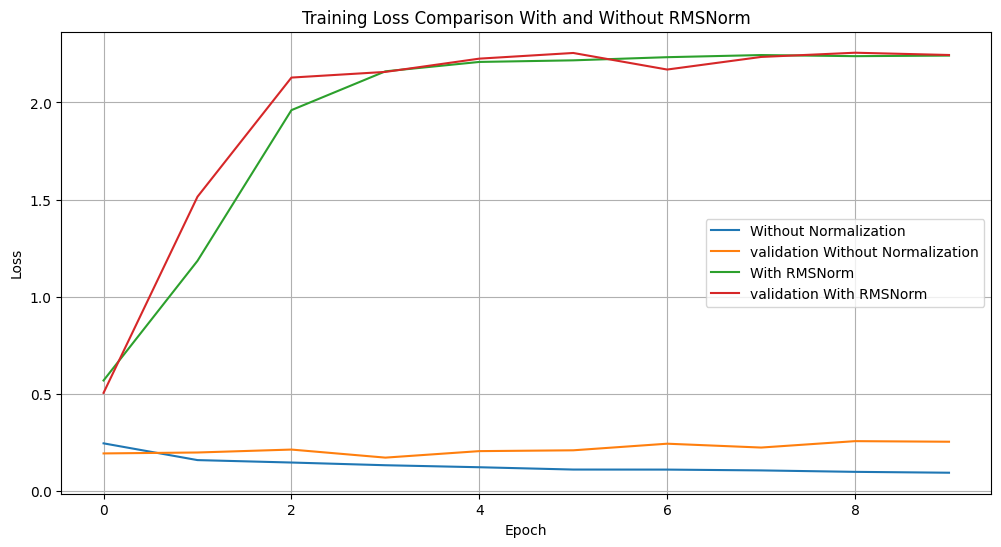

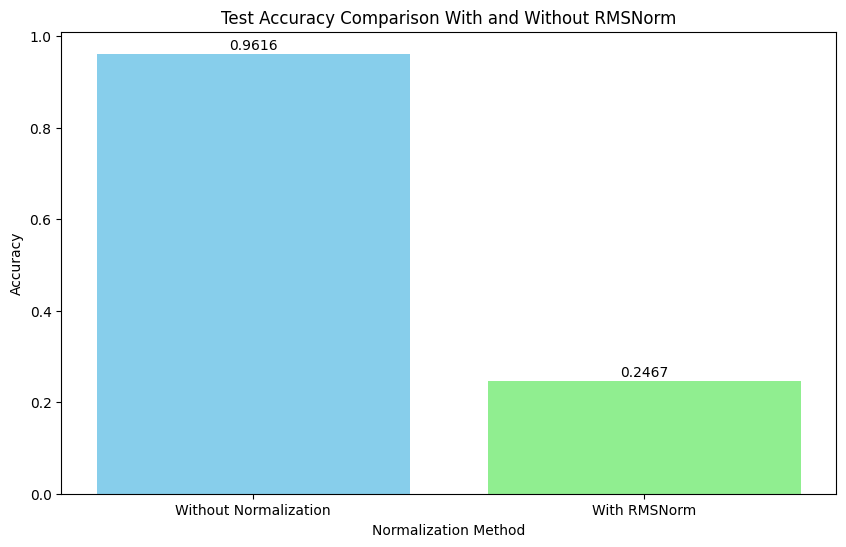

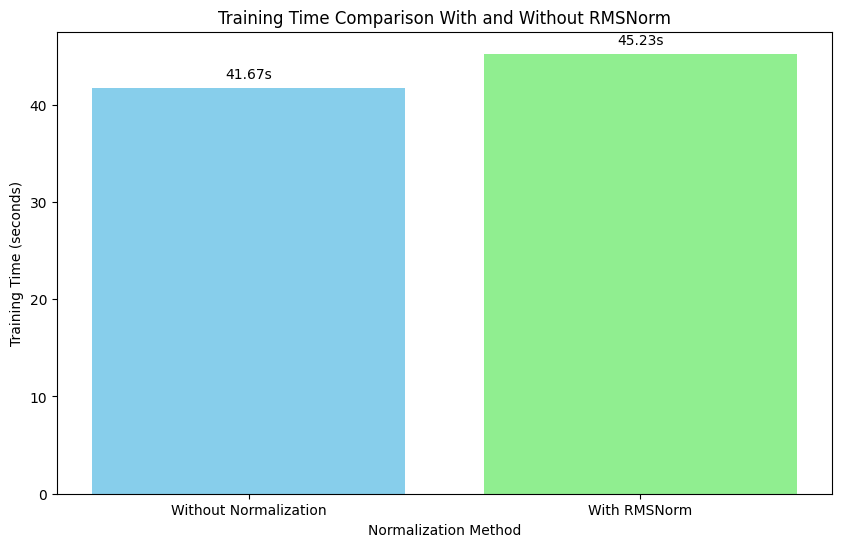

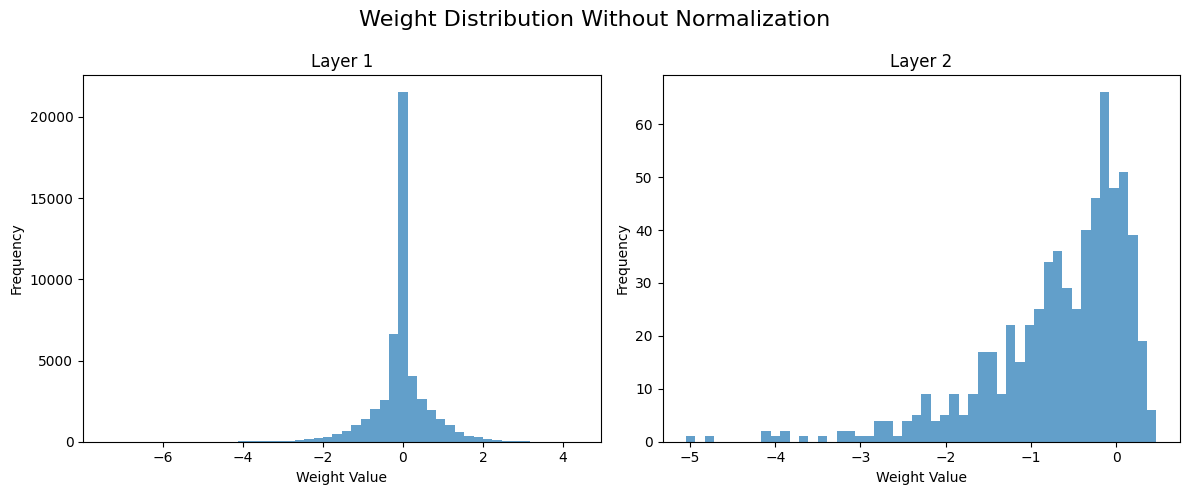

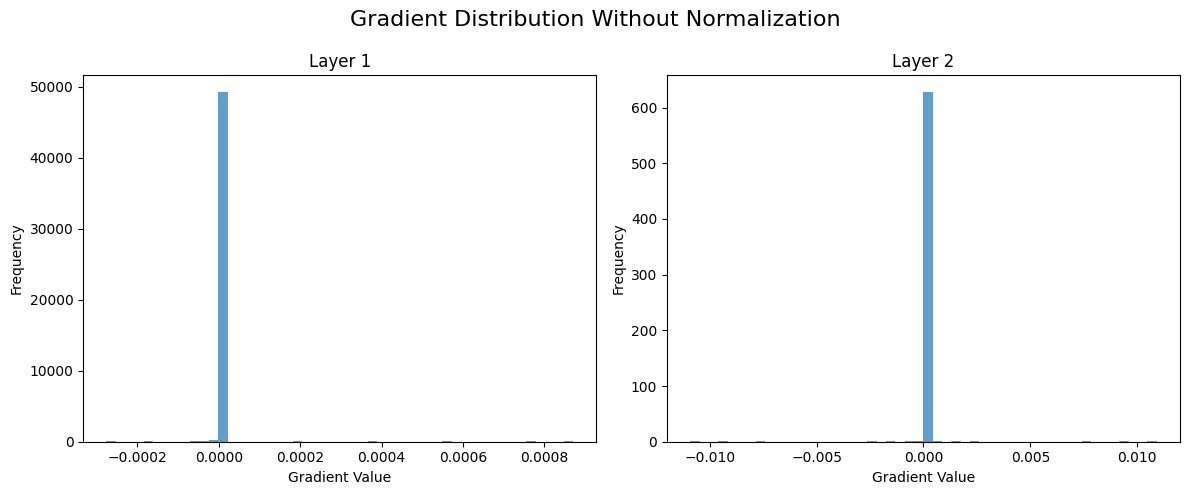

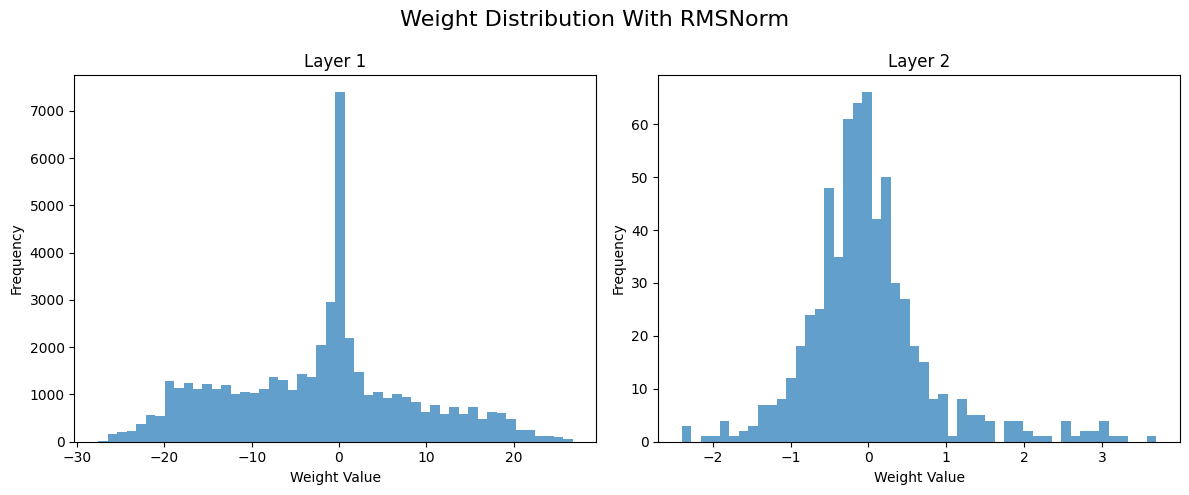

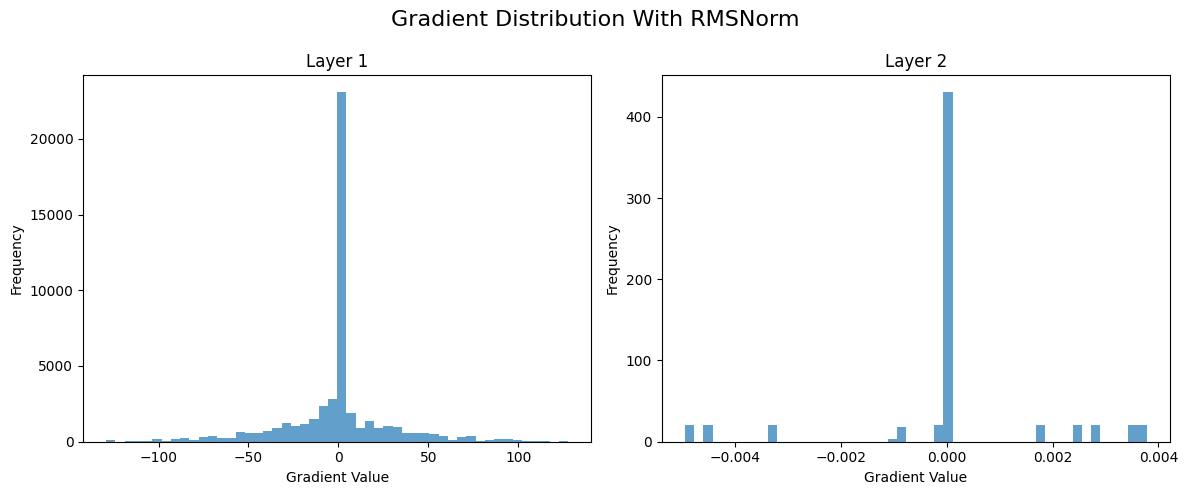

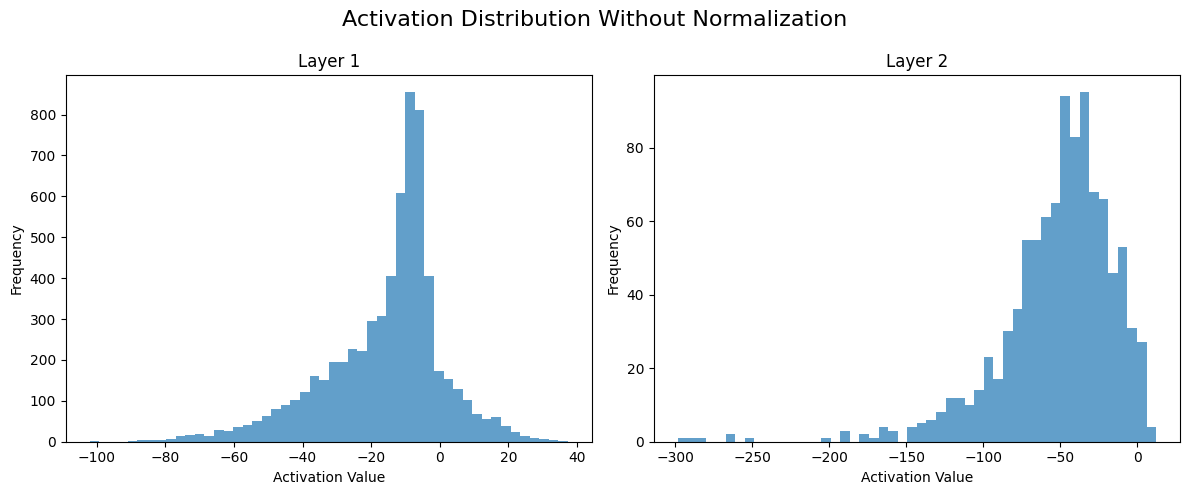

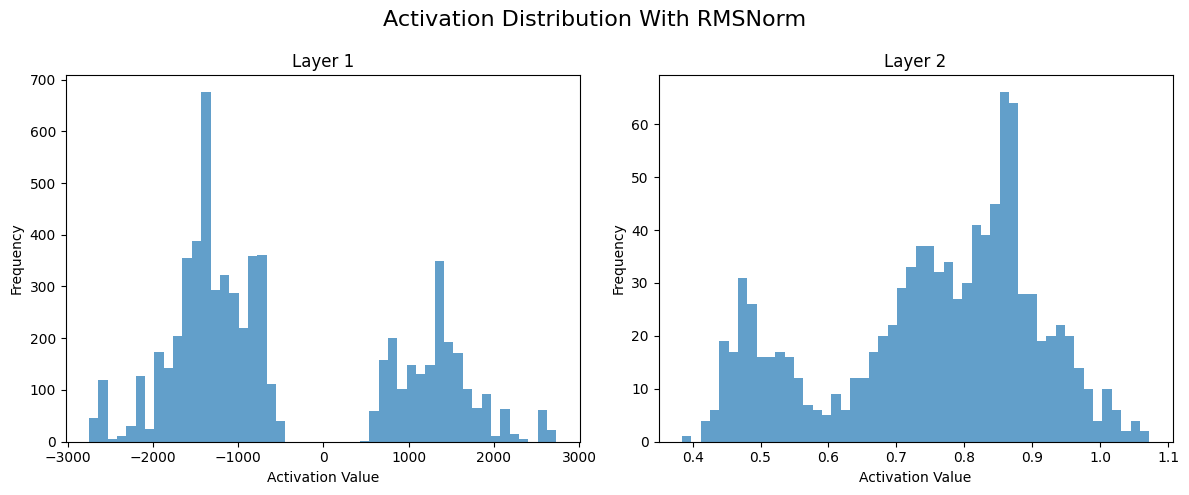

In [3]:
# Load MNIST dataset
# X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = load_mnist_data(subset_size=10000)
X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = load_mnist_data()


input_size = X_train.shape[1]  # 784 for MNIST
output_size = y_train_onehot.shape[1]  # 10 for MNIST
hidden_size = 64  # Fixed hidden layer size for all experiments

# Experiment configs
epochs = 10
batch_size = 32
learning_rate = 0.01

# Test with and without RMSNorm
normalizations = [
    ("Without Normalization", NoNormalization()),
    ("With RMSNorm", RMSNorm(epsilon=1e-8))
]

norm_histories = []
norm_accuracies = []
trained_models = []
training_times = []

for name, normalization in normalizations:
    model_name = f"FFNN {name}"
    print(f"\nTraining model {name}")
    
    model = create_model_with_normalization(input_size, hidden_size, output_size, normalization)
    
    history, accuracy, training_time, trained_model = train_and_evaluate(
        model, X_train, X_test, y_train_onehot, y_test, y_test_onehot,
        epochs=epochs, batch_size=batch_size, learning_rate=learning_rate,
        model_name=model_name
    )
    
    norm_histories.append(history)
    norm_accuracies.append(accuracy)
    trained_models.append(trained_model)
    training_times.append(training_time)

# Plot loss curves
plt.figure(figsize=(12, 6))
for i, (name, _) in enumerate(normalizations):
    plt.plot(norm_histories[i]['loss'], label=f'{name}')
    plt.plot(norm_histories[i]['val_loss'], label=f'validation {name}')  
plt.title('Training Loss Comparison With and Without RMSNorm')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('../../out/rmsnorm_comparison_loss.png')

# Bar chart of accuracies
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in normalizations], norm_accuracies, color=['skyblue', 'lightgreen'])
plt.title('Test Accuracy Comparison With and Without RMSNorm')
plt.xlabel('Normalization Method')
plt.ylabel('Accuracy')
# plt.ylim([0.8, 1.0])
for i, v in enumerate(norm_accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.savefig('../../out/rmsnorm_comparison_accuracy.png')

# Bar chart of training times
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in normalizations], training_times, color=['skyblue', 'lightgreen'])
plt.title('Training Time Comparison With and Without RMSNorm')
plt.xlabel('Normalization Method')
plt.ylabel('Training Time (seconds)')
for i, v in enumerate(training_times):
    plt.text(i, v + 1, f"{v:.2f}s", ha='center')
plt.savefig('../../out/rmsnorm_comparison_time.png')

# Plot weight and gradient distribution
for i, (name, _) in enumerate(normalizations):
    model = trained_models[i]
    
    # Plot weight distributions
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Weight Distribution {name}', fontsize=16)
    
    for j, layer in enumerate(model.layers):
        plt.subplot(1, len(model.layers), j+1)
        weights = layer.weights.flatten()
        plt.hist(weights, bins=50, alpha=0.7)
        plt.title(f'Layer {j+1}')
        plt.xlabel('Weight Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'../../out/rmsnorm_{i}_weight_dist.png')
    
    # Plot gradient distributions
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Gradient Distribution {name}', fontsize=16)
    
    for j, layer in enumerate(model.layers):
        plt.subplot(1, len(model.layers), j+1)
        gradients = layer.weights_grad.flatten()
        plt.hist(gradients, bins=50, alpha=0.7)
        plt.title(f'Layer {j+1}')
        plt.xlabel('Gradient Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'../../out/rmsnorm_{i}_gradient_dist.png')

# Plot activation distributions
for i, (name, _) in enumerate(normalizations):
    model = trained_models[i]
    
    # Get a batch of data to test activations
    batch_indices = np.random.choice(len(X_test), min(100, len(X_test)), replace=False)
    batch_X = X_test[batch_indices]
    
    # Forward pass to collect activations
    activations = []
    output = batch_X
    for layer in model.layers:
        output = layer.forward(output)
        activations.append(layer.output_before_activation.flatten())
    
    # Plot activation distributions
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Activation Distribution {name}', fontsize=16)
    
    for j, activation in enumerate(activations):
        plt.subplot(1, len(activations), j+1)
        plt.hist(activation, bins=50, alpha=0.7)
        plt.title(f'Layer {j+1}')
        plt.xlabel('Activation Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'../../out/rmsnorm_{i}_activation_dist.png')

In [4]:
print("\nACCURACY RESULTS:")
for i, (name, _) in enumerate(normalizations):
    print(f"{name}: {norm_accuracies[i]:.4f}")

print("\nTRAINING TIME RESULTS:")
for i, (name, _) in enumerate(normalizations):
    print(f"{name}: {training_times[i]:.2f} seconds")

accuracy_diff = abs(norm_accuracies[1] - norm_accuracies[0])
time_diff = abs(training_times[1] - training_times[0])

print(f"\nAccuracy difference: {accuracy_diff:.4f}")
print(f"Training time difference: {time_diff:.2f} seconds")


ACCURACY RESULTS:
Without Normalization: 0.9616
With RMSNorm: 0.2467

TRAINING TIME RESULTS:
Without Normalization: 41.67 seconds
With RMSNorm: 45.23 seconds

Accuracy difference: 0.7149
Training time difference: 3.56 seconds
